# Balansiranje 

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# %matplotlib notebook 


### Uvoz podatkov

In [202]:
t = np.load('LV balansiranje - testno_stanje.npy',allow_pickle=True)
z = np.load('LV balansiranje -zacetno_stanje.npy',allow_pickle=True)

t = t.tolist()
z = z.tolist()

data_t = t['data']
data_z = z['data']
fs = 25600
t = np.linspace(0, 1, fs)
dt = t[1]-t[0]

### Povprečna vrtilna frekvenca

C:\Users\marko\AppData\Local\Temp\ipykernel_22012\1221590585.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


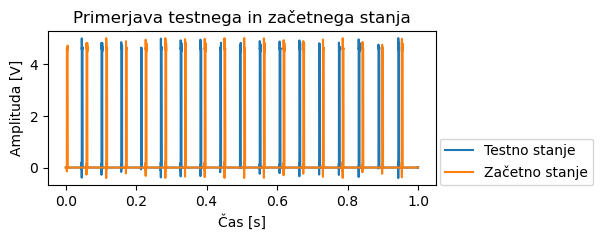

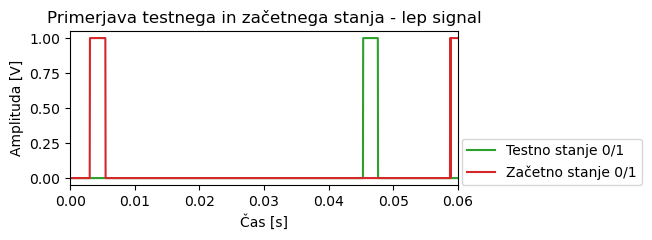

In [203]:
n0t = data_t[:,2]
n0z = data_z[:,2]

fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(t, n0t, label='Testno stanje')
ax.plot(t, n0z, label='Začetno stanje')
ax.set_title('Primerjava testnega in začetnega stanja')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Amplituda [V]')
ax.legend(loc=(1.01, 0));

n0t2 = []
n0z2 = []
for i in range(len(n0t)):
    # Za testno stanje
    if n0t[i] > 1:
        n0t2.append(1)
    else:	
        n0t2.append(0)
    # Za začetno stanje
    if n0z[i] > 0.1:
        n0z2.append(1)
    else:
        n0z2.append(0)


n0t2 = np.array(n0t2)
n0z2 = np.array(n0z2)

fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(t, n0t2, color='C2', label='Testno stanje 0/1')
ax.plot(t, n0z2, color='C3', label='Začetno stanje 0/1')
ax.set_title('Primerjava testnega in začetnega stanja - lep signal')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Amplituda [V]')
ax.set_xlim(0, 0.06)
ax.legend(loc=(1.01, 0));
fig.show()

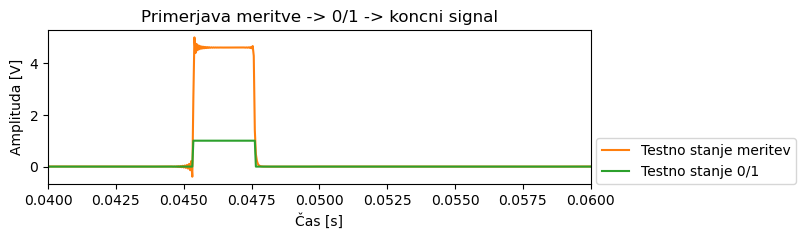

In [204]:
fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(t, n0t, color='C1', label='Testno stanje meritev')
ax.plot(t, n0t2, color='C2', label='Testno stanje 0/1')
# ax.plot(t, n0z2, color='C3', label='Začetno stanje 0/1')
ax.set_title('Primerjava meritve -> 0/1 -> koncni signal')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Amplituda [V]')
ax.set_xlim(0.04, 0.06)
ax.legend(loc=(1.01, 0));
fig.savefig('primerjava_testno_zacetno_stanje.png', dpi=300, bbox_inches='tight')

In [205]:
def cleanup(n0t2):
    A = np.where(n0t2 == 1)[0]
    A = A.tolist()
    A =  np.array(A)
    A_new = []
    for i in range(len(A)-1):
        if A[i+1] - A[i] > 300:
            A_new.append(A[i])
    n0t3 = np.zeros(len(n0t2))
    for i in range(len(A_new)):
        n0t3[A_new[i]] = 1
    return n0t3, A_new

povprečna frekvenca testnega stanja je 17.81 Hz
povprečna frekvenca začetnega stanja je 17.88 Hz


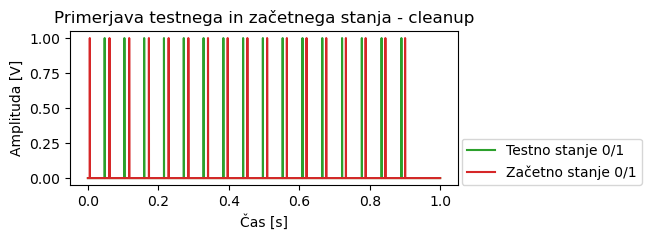

In [206]:
n0t3, It = cleanup(n0t2)
n0z3, Iz = cleanup(n0z2)

fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(t, n0t3, color='C2', label='Testno stanje 0/1')
ax.plot(t, n0z3, color='C3', label='Začetno stanje 0/1')
ax.set_title('Primerjava testnega in začetnega stanja - cleanup')
ax.set_xlabel('Čas [s]')    
ax.set_ylabel('Amplituda [V]')
# ax.set_xlim(0, 0.06)
ax.legend(loc=(1.01, 0));

Izz = []
for i in range(len(Iz)-1):
    l = Iz[i+1] - Iz[i]
    Izz.append(l)
Izz = np.array(Izz)
Izz = Izz*dt
Itt = []

for i in range(len(It)-1):
    l = It[i+1] - It[i]
    Itt.append(l)
Itt = np.array(Itt)
Itt = Itt*dt
Ft = 1/np.mean(Itt)
Fz = 1/np.mean(Izz)
print(f'povprečna frekvenca testnega stanja je {Ft:.2f} Hz')
print(f'povprečna frekvenca začetnega stanja je {Fz:.2f} Hz')


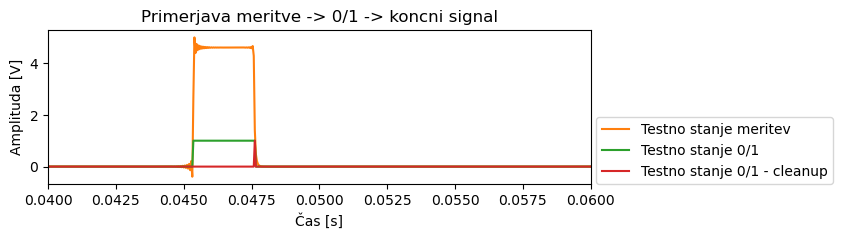

In [207]:
fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(t, n0t, color='C1', label='Testno stanje meritev')
ax.plot(t, n0t2, color='C2', label='Testno stanje 0/1')
ax.plot(t, n0t3, color='C3', label='Testno stanje 0/1 - cleanup')
# ax.plot(t, n0z2, color='C3', label='Začetno stanje 0/1')
ax.set_title('Primerjava meritve -> 0/1 -> koncni signal')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Amplituda [V]')
ax.set_xlim(0.04, 0.06)
ax.legend(loc=(1.01, 0));
fig.savefig('primerjava_testno_zacetno_stanje.png', dpi=300, bbox_inches='tight')

Podobno analizo lahko naredimo tudi s Fourierjevo transformacijo, a smo zaradi sprektralne ločljivosti omejeni na korak 1Hz.

vzbujevalna frekvenca je 18.00 Hz


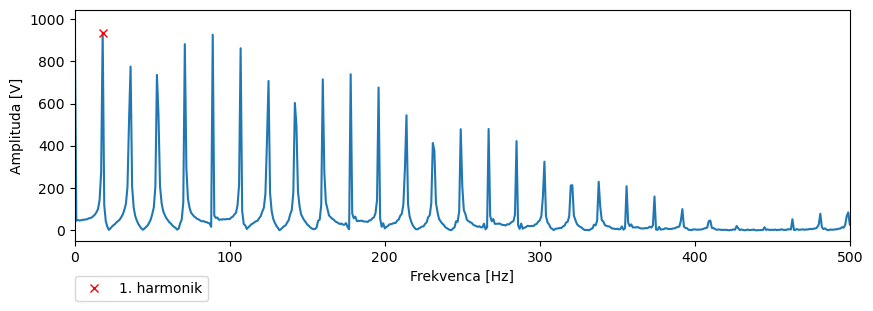

In [208]:
A = np.fft.rfft(n0t2)
freq = np.fft.rfftfreq(len(n0t2), 1/25600)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(freq, np.abs(A))
ax.set_xlim(0, 500)

F = []
X = []
for i in range(1, 1000):
    if np.abs(A[i]) > 750:
        # print(i, np.abs(A[i]))
        F.append(freq[i])
        X.append(np.abs(A[i]))
ax.plot(F[0], X[0], 'rx', label='1. harmonik');
ax.set_xlabel('Frekvenca [Hz]')
ax.set_ylabel('Amplituda [V]')
ax.legend(loc=(0, -0.26));
print(f'vzbujevalna frekvenca je {F[0]:.2f} Hz')

### FFT

In [209]:
A = np.fft.rfft(data_z[:, 0])/len(data_z[:, 0])
A[1:] *= 2
freq = np.fft.rfftfreq(len(data_z[:, 0]), d=1/fs)

max_A = np.max(abs(A[:30]))
max_f = np.where(abs(A[:30]) == np.max(abs(A[10:30])))


vzbujevalna frekvenca je 17.84 Hz


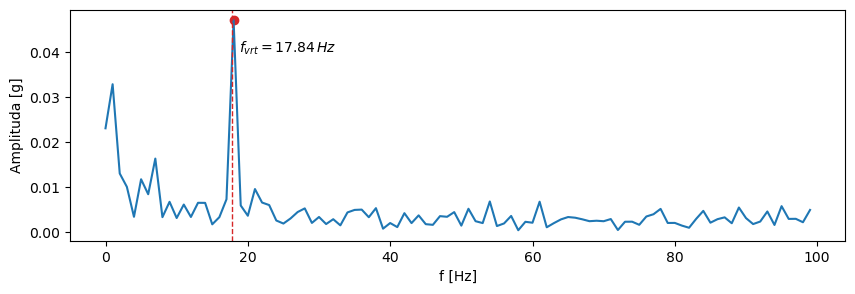

In [210]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(freq[:100], abs(A)[:100])
ax.scatter(max_f, max_A, color='C3')
freq_F = (Fz + Ft)/2
print(f'vzbujevalna frekvenca je {freq_F:.2f} Hz')
ax.axvline(freq_F, linestyle='--', linewidth=1, color='C3')
ax.text(18.8, 0.04,'$f_{vrt}=17.84\,Hz$')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Amplituda [g]');

#### Filtriranje

In [211]:

# Vzamemo frekvence */- 5%
sos = signal.butter(3, (0.95*freq_F,1.05*freq_F), 'bandpass', fs=fs, output='sos')
filt_t = signal.sosfiltfilt(sos, data_t[:,0]*np.hanning(len(data_t[:,0]))) # Signal za mesto A
filt_z = signal.sosfiltfilt(sos, data_z[:,0]*np.hanning(len(data_t[:,0]))) # Signal za mesto A

filt_t_B = signal.sosfiltfilt(sos, data_t[:,1]*np.hanning(len(data_t[:,1]))) # Signal za mesto B
filt_z_B = signal.sosfiltfilt(sos, data_z[:,1]*np.hanning(len(data_t[:,1]))) # Signal za mesto B

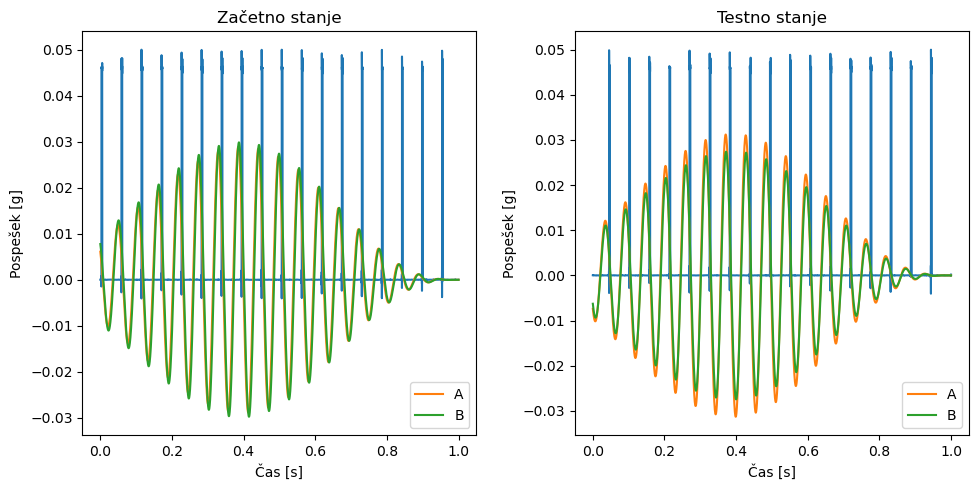

In [212]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))

ax1.set_title('Začetno stanje')
ax1.plot(t, 0.01*data_z[:,2])
ax1.plot(t, filt_z, label='A')
ax1.plot(t, filt_z_B, label='B')
ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Pospešek [g]')
ax1.legend(loc='lower right')

fig.tight_layout()
ax2.set_title('Testno stanje')
ax2.plot(t, 0.01*data_t[:, 2])
ax2.plot(t, filt_t, label='A')
ax2.plot(t, filt_t_B, label='B')
ax2.set_xlabel('Čas [s]')
ax2.set_ylabel('Pospešek [g]')
ax2.legend(loc='lower right');
fig.subplots_adjust(wspace=0.25)

plt.savefig('balansiranje_filtered.png',dpi=300)

### Določitev začetnih amplitud in faze ter testne amplitude in faze

Ker smo filtrirali z oknom nam bo amplitudo posamezne meritve dala največja vrednost v določeni meritvi.

In [213]:
A0 = np.max(filt_z) # max zacetna amplituda A
print(f'zažetna amplituda A {A0:.4f}')
B0 = np.max(filt_z_B) #max zacetna amplituda B
print(f'zažetna amplituda B {B0:.4f}')
print()
A1 = np.max(filt_t) # max testna amplituda A
print(f'testna amplituda A {A1:.4f}')
B1 = np.max(filt_t_B) #max testna amplituda B
print(f'testna amplituda B {B1:.4f}')
print()
phi_A0 = np.where(filt_z == np.max(filt_z))[0][0]/fs
print(f'faza max amplitude A: {phi_A0:.4f}')                #lokacija maksimalne amplitude A - index
phi_B0 = np.where(filt_z_B == np.max(filt_z_B))[0][0]/fs
print(f'faza max amplitude B: {phi_B0:.4f}')                #lokacija maksimalne amplitude B - index
print()
phi_A1 = np.where(filt_t == np.max(filt_t))[0][0]/fs
print(f'faza max amplitude A test: {phi_A1}')               #lokacija maksimalne amplitude A test  - index
phi_B1 = np.where(filt_t_B == np.max(filt_t_B))[0][0]/fs
print(f'faza max amplitude B test: {phi_B1}')               #lokacija maksimalne amplitude B test  - index
print()
phi_z = -(0.562 - phi_A0) * freq_F * 2 * np.pi
phi_z #fazni zamik
phi_z_B = -(0.5065 - phi_B0) * freq_F * 2 * np.pi
phi_z_B #fazni zamik
print()
phi_t = -(0.4945 - phi_A1) * freq_F * 2 * np.pi
phi_t #fazni zamik
phi_t_B = -(0.4945 - phi_B1) * freq_F * 2 * np.pi
phi_t_B #fazni zamik

zažetna amplituda A 0.0288
zažetna amplituda B 0.0298

testna amplituda A 0.0312
testna amplituda B 0.0274

faza max amplitude A: 0.3850
faza max amplitude B: 0.3870

faza max amplitude A test: 0.370859375
faza max amplitude B test: 0.3719140625




-13.74244026885182

### Začetno stanje

Frekvenca vzbujanja Fz: 17.88 Hz
Število vzorcev na obrat: 1432.00

fazni zamik začetnega stanja: 57.1366 rad, 3273.69°
fazni zamik začetnega stanja: 55.8247 rad, 3198.52°, amplituda: 0.0288 g
fazni zamik začetnega stanja: 56.0441 rad, 3211.09°, amplituda: 0.0298 g

75.16759776536318
62.597765363128524


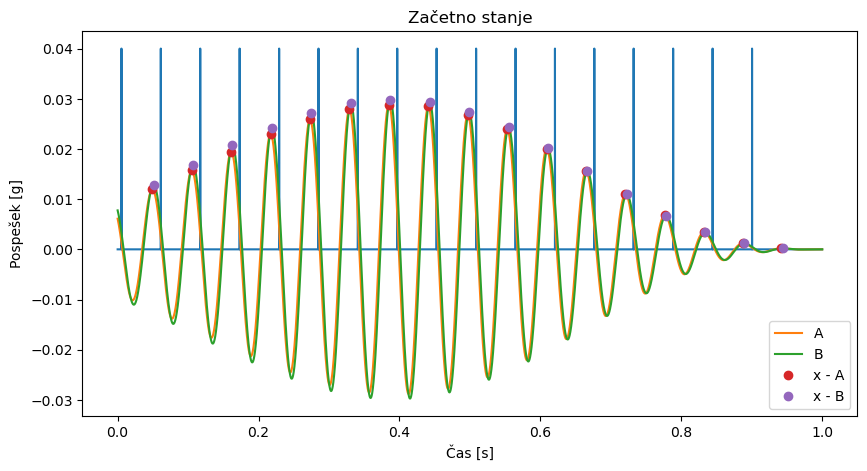

In [214]:
print(f'Frekvenca vzbujanja Fz: {Fz:.2f} Hz')
Šz = (1/Fz)/dt
print(f'Število vzorcev na obrat: {Šz:.2f}')
print()
peaksA, _ = signal.find_peaks(filt_z, distance=Šz*0.8)
peaksB, _ = signal.find_peaks(filt_z_B, distance=Šz*0.8)

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_title('Začetno stanje')
ax1.plot(t, 0.04*n0z3)
ax1.plot(t, filt_z, label='A')
ax1.plot(t, filt_z_B, label='B')
ax1.plot(peaksA*dt, filt_z[peaksA], 'o', label="x - A")
ax1.plot(peaksB*dt, filt_z_B[peaksB], 'o',label="x - B")
ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Pospešek [g]')
ax1.legend(loc='lower right');
fig.savefig('balansiranje_peaks_zač.png',dpi=300)
j = 8
A0 = np.max(filt_z) # max zacetna amplituda A
B0 = np.max(filt_z_B) #max zacetna amplituda B

phiNz = np.where(n0z3 == 1)[0][j]*dt * Fz * 2 * np.pi + 2* np.pi #fazni zamik [rad]
print(f'fazni zamik začetnega stanja: {phiNz:.4f} rad, {phiNz*180/np.pi:.2f}°')

phiA0 = peaksA[j]*dt * Fz * 2 * np.pi #fazni zamik [rad]
phiB0 = peaksB[j]*dt * Fz * 2 * np.pi #fazni zamik [rad] #fazni zamik [rad]
print(f'fazni zamik začetnega stanja: {phiA0:.4f} rad, {phiA0*180/np.pi:.2f}°, amplituda: {A0:.4f} g')
print(f'fazni zamik začetnega stanja: {phiB0:.4f} rad, {phiB0*180/np.pi:.2f}°, amplituda: {B0:.4f} g')
print()
print(180*(phiNz - phiA0)/(np.pi))
print(180*(phiNz - phiB0)/(np.pi))

### Testno stanje

Frekvenca vzbujanja Ft: 17.81 Hz
Število vzorcev na obrat: 1437.53
fazni zamik ref lege: 49.4932 rad, 2835.75°
fazni zamik začetnega stanja: 47.7598 rad, 2736.44°, amplituda: 0.0312 g
fazni zamik začetnega stanja: 47.8822 rad, 2743.45°, amplituda: 0.0274 g
99.31677400015658
92.30476268447705


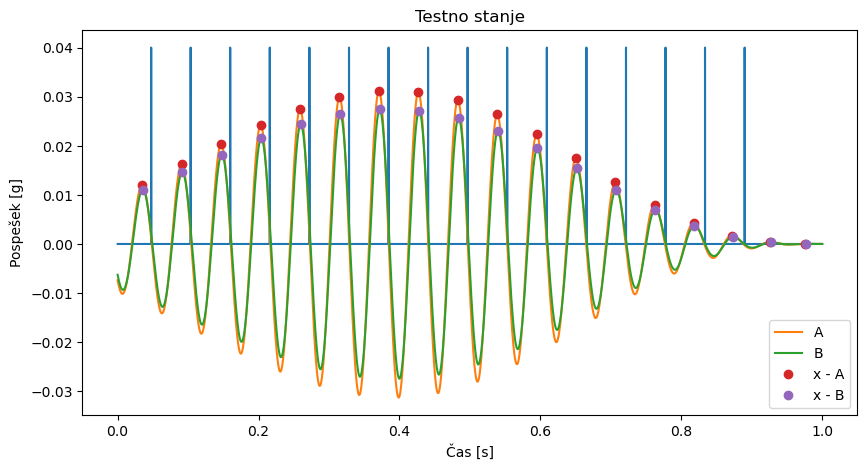

In [215]:
print(f'Frekvenca vzbujanja Ft: {Ft:.2f} Hz')
Št = (1/Ft)/dt
print(f'Število vzorcev na obrat: {Št:.2f}')

peaksA, _ = signal.find_peaks(filt_t, distance=Št*0.8)
peaksB, _ = signal.find_peaks(filt_t_B, distance=Št*0.8)

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_title('Testno stanje')
ax1.plot(t, 0.04*n0t3)
ax1.plot(t, filt_t, label='A')
ax1.plot(t, filt_t_B, label='B')
ax1.plot(peaksA*dt, filt_t[peaksA], 'o', label="x - A")
ax1.plot(peaksB*dt, filt_t_B[peaksB], 'o',label="x - B")
ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Pospešek [g]')
ax1.legend(loc='lower right');

fig.savefig('balansiranje_peaks_test.png',dpi=300)
i = 7
A1 = np.max(filt_t) # max zacetna amplituda A
B1 = np.max(filt_t_B) #max zacetna amplituda B

phiNt = np.where(n0t3 == 1)[0][i]*dt * Fz * 2 * np.pi #fazni zamik [rad]
print(f'fazni zamik ref lege: {phiNt:.4f} rad, {phiNt*180/np.pi:.2f}°')

phiA1 = peaksA[i]*dt * Ft * 2 * np.pi #fazni zamik [rad]
phiB1 = peaksB[i]*dt * Ft * 2 * np.pi #fazni zamik [rad] #fazni zamik [rad]
print(f'fazni zamik začetnega stanja: {phiA1:.4f} rad, {phiA1*180/np.pi:.2f}°, amplituda: {A1:.4f} g')
print(f'fazni zamik začetnega stanja: {phiB1:.4f} rad, {phiB1*180/np.pi:.2f}°, amplituda: {B1:.4f} g')
print(180*(phiNt - phiA1)/(np.pi))
print(180*(phiNt - phiB1)/(np.pi))

### Balansiranje

In [216]:
mt = 2.8 #g

#### A

Ležajno mesto A:
-----------------
A0 = 0.0288 g
A1 = 0.0312 g

alpha0 = 7.5951 rad, 435.17°
alpha1 = 1.7334 rad, 99.32°

Amplituda A: 0.0128 g
Korekcijski fazni zamik A: 1.5425 rad, 88.38°
korekcijska masa A: 6.3217 g


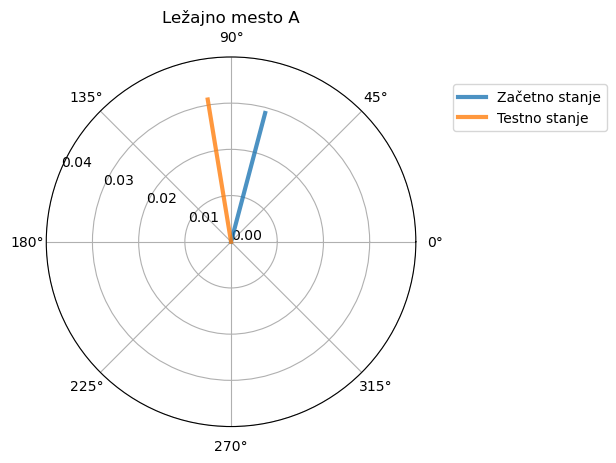

In [217]:
print("Ležajno mesto A:")
print("-----------------")
print(f'A0 = {A0:.4f} g')
print(f'A1 = {A1:.4f} g')
print()
alpha1 = phiNt - phiA1
alpha0 = phiNz - phiA0 + 2 * np.pi
print(f'alpha0 = {alpha0:.4f} rad, {alpha0*180/np.pi:.2f}°') #fazni zamik [rad] začetno stanje
print(f'alpha1 = {alpha1:.4f} rad, {alpha1*180/np.pi:.2f}°') #fazni zamik [rad] testno stanje
Aw_A = np.sqrt(A0**2 + A1**2 - 2*A0*A1*np.cos(alpha1 - alpha0))
CosA = (A0**2+Aw_A**2-A1**2)/(2*A0*Aw_A)
phi_A_kor = np.arccos(CosA)
print()
print(f'Amplituda A: {Aw_A:.4f} g')
print(f'Korekcijski fazni zamik A: {phi_A_kor:.4f} rad, {phi_A_kor*180/np.pi:.2f}°')

m_c_A = A0/Aw_A * mt
print(f'korekcijska masa A: {m_c_A:.4f} g')

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('Ležajno mesto A')

ax.plot([alpha0, alpha0], [0, A0], 'C0-', linewidth=3, alpha=0.8, label='Začetno stanje')
ax.plot([alpha1, alpha1], [0, A1], 'C1-', linewidth=3, alpha=0.8, label='Testno stanje')

ax.set_rticks([0, 0.01, 0.02, 0.03, 0.04]) 
ax.set_rlabel_position(157)
ax.legend(loc=(1.1, 0.8))
ax.grid(True)
fig.savefig('balansiranje_polar_A.png',dpi=300)


#### B

Ležajno mesto B:
-----------------
B0 = 0.0298 g
B1 = 0.0274 g

beta0 = 7.3757 rad, 422.60°
beta1 = 1.6110 rad, 92.30°

Amplituda B: 0.0149 g
Korekcijski fazni zamik B: 1.1518 rad, 66.00°
korekcijska masa B: 5.6222 g


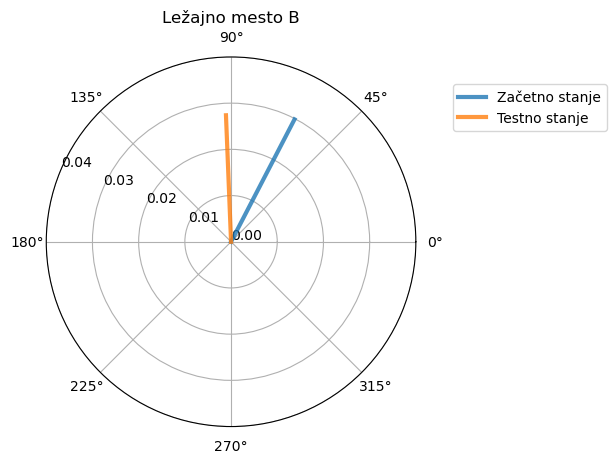

In [218]:
print("Ležajno mesto B:")
print("-----------------")
print(f'B0 = {B0:.4f} g')
print(f'B1 = {B1:.4f} g')
print()
beta1 = phiNt - phiB1
beta0 = phiNz - phiB0 + 2 * np.pi
print(f'beta0 = {beta0:.4f} rad, {beta0*180/np.pi:.2f}°') #fazni zamik [rad] začetno stanje
print(f'beta1 = {beta1:.4f} rad, {beta1*180/np.pi:.2f}°') #fazni zamik [rad] testno stanje
Aw_B = np.sqrt(B0**2 + B1**2 - 2*B0*B1*np.cos(beta1 - beta0))
CosB = (B0**2+Aw_B**2-B1**2)/(2*B0*Aw_B)
phi_B_kor = np.arccos(CosB)
print()
print(f'Amplituda B: {Aw_B:.4f} g')
print(f'Korekcijski fazni zamik B: {phi_B_kor:.4f} rad, {phi_B_kor*180/np.pi:.2f}°')

m_c_B = B0/Aw_B * mt
print(f'korekcijska masa B: {m_c_B:.4f} g')

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('Ležajno mesto B')

ax.plot([beta0, beta0], [0, B0], 'C0-', linewidth=3, alpha=0.8, label='Začetno stanje')
ax.plot([beta1, beta1], [0, B1], 'C1-', linewidth=3, alpha=0.8, label='Testno stanje')

ax.set_rticks([0, 0.01, 0.02, 0.03, 0.04]) 
ax.set_rlabel_position(157)
ax.legend(loc=(1.1, 0.8))
ax.grid(True)
fig.savefig('balansiranje_polar_B.png',dpi=300)


In [219]:
m_c = (m_c_A + m_c_B)/2
phi_kor = (phi_A_kor + phi_B_kor)/2
print(f'Korekcijska masa: {m_c:.4f} g')
print(f'Korekcijski fazni zamik: {phi_kor:.4f} rad, {phi_kor*180/np.pi:.2f}°')

Korekcijska masa: 5.9719 g
Korekcijski fazni zamik: 1.3472 rad, 77.19°
